# iter one (extracted each mandals cleaned and saved)

In [2]:
import pandas as pd
import seaborn as sns
import glob
import os
import tensorflow 

In [133]:
feat_list = ['District', 'Mandal', 'Date', 'Rain (mm)', 'Min Temp (°C)',
       'Max Temp (°C)', 'Min Humidity (%)', 'Max Humidity (%)',
       'Min Wind Speed (Kmph)', 'Max Wind Speed (Kmph)']
       
def reader(year):    # For 2020   2,3 --> swap last 2 columns and remove 1st dmcode  1  --> swap last 2 coumns   4 --> remove 1st 2 columns 
    df_combined = pd.DataFrame()
    for name in glob.glob('Data/'+str(year)+'/*'):
        print(name)
        try:
            df1 = pd.read_csv(name)
            df1.columns = feat_list
        except: 
            df1 = pd.read_excel(name)
            df1.columns = feat_list
        df_combined = pd.concat([df_combined,df1])
        
    return df_combined


In [136]:
df_combined_2019 = reader(2019)

Data/2019\1_2019.csv
Data/2019\2_2019.csv
Data/2019\3_2019.csv
Data/2019\4_2019.csv


In [146]:
df_combined_2021
df_combined_2021['Date'] = pd.to_datetime(df_combined_2021['Date'])
# fg = gh.sort_values(by='Date')

In [148]:
df_combined_2021.sort_values(by='Date')

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
40320,Jogulamba Gadwal,Kaloor_Timmanadoddi,2021-01-01,0.0,19.9,28.7,49.5,96.1,NaN,NaN
37170,Rangareddy,Kondurg,2021-01-01,0.0,16.4,27.3,69.1,100.0,NaN,NaN
25740,Medak,Regode,2021-01-01,0.0,15.5,29.9,52.3,94.6,NaN,NaN
4680,Nirmal,Tanur,2021-01-01,0.0,15.5,27.6,39.7,90.6,NaN,NaN
12690,Jayashankar,Bhupalpalle,2021-01-01,0.0,17.5,30.0,61.1,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7656,Mancherial,Tandur,2021-12-31,0.0,16.8,26.3,70.1,96.5,0.1,1.1
14011,Rangareddy,Serilingampally,2021-12-31,0.0,16.8,28.0,47.2,91.1,0.0,59.7
17142,Wanaparthy,Chinnambavi,2021-12-31,0.0,18.4,30.6,41.8,95.1,0.0,10.9
7594,Mancherial,Naspur,2021-12-31,0.0,17.1,28.6,77.3,100.0,0.0,5.7


In [149]:
city = ["Adilabad", "Nizamabad", "Warangal Rural", 'Warangal Urban', "Karimnagar","Khammam","Warangal"]

def mandal_creater(year, df_combined):
    base_dir = "Mandals/"+str(year)+"/"
    for name in city:
        df_ = df_combined[df_combined["District"] == name]
        if df_.empty == True:
            continue
        os.makedirs(base_dir+str(name)+'/')
        for mands in df_["Mandal"].unique():
            df__ = df_[df_["Mandal"] == mands]
            df__ = df__.drop_duplicates('Date', keep='first')
            df__["Date"] = pd.to_datetime(df__['Date'])
            df__ = df__.sort_values(by='Date')
            # df__ = df__.iloc[:,:-1]
            df__ = df__.set_index('Date')
            df__.to_csv(base_dir+str(name)+'/'+str(mands)+".csv")

In [150]:
df_combined_2019 = reader(2021)
df_combined_2020 = reader(2020)
df_combined_2021 = reader(2021)
df_combined_2022 = reader(2022)

mandal_creater(2019, df_combined_2019)
mandal_creater(2020, df_combined_2020)
mandal_creater(2021, df_combined_2021)
mandal_creater(2022, df_combined_2022)

Data/2021\10_2021.csv
Data/2021\11_2021.csv
Data/2021\1_2021.xlsx
Data/2021\2_2021.csv
Data/2021\3_2021.csv
Data/2021\5_2021.csv
Data/2021\6_2021.csv
Data/2021\7_2021.csv
Data/2021\8__2021.csv
Data/2021\9_2021.csv
Data/2020\1_2020.csv
Data/2020\2_2020.csv
Data/2020\3_2020.csv
Data/2020\4_2020.csv
Data/2021\10_2021.csv
Data/2021\11_2021.csv
Data/2021\1_2021.xlsx
Data/2021\2_2021.csv
Data/2021\3_2021.csv
Data/2021\5_2021.csv
Data/2021\6_2021.csv
Data/2021\7_2021.csv
Data/2021\8__2021.csv
Data/2021\9_2021.csv
Data/2022\1_2022.csv
Data/2022\2_2022.csv
Data/2022\3_2022.csv
Data/2022\4_2022.csv
Data/2022\5_2022.csv
Data/2022\6_2022.csv
Data/2022\7_2022.csv
Data/2022\8_2022.csv
Data/2022\9_2022.csv


In [33]:
df_imp_19_clean[df_imp_19_clean["District"] == "Khammam"].count()

District                 364
Mandal                   364
Rainfall (mm)            364
temp_min (⁰C)            364
temp_max (⁰C)            364
humidity_min (%)         364
Humidity_max (%)         364
wind_speed_min (Kmph)    361
wind_speed_max (Kmph)    361
dtype: int64

In [12]:
import plotly.express as px

# df = px.data.gapminder().query("country=='Canada'")
fig = px.line(df_combined_2019_dup.iloc[:,:], y="temp_max (⁰C)", title='Temp over year ')
fig.show()

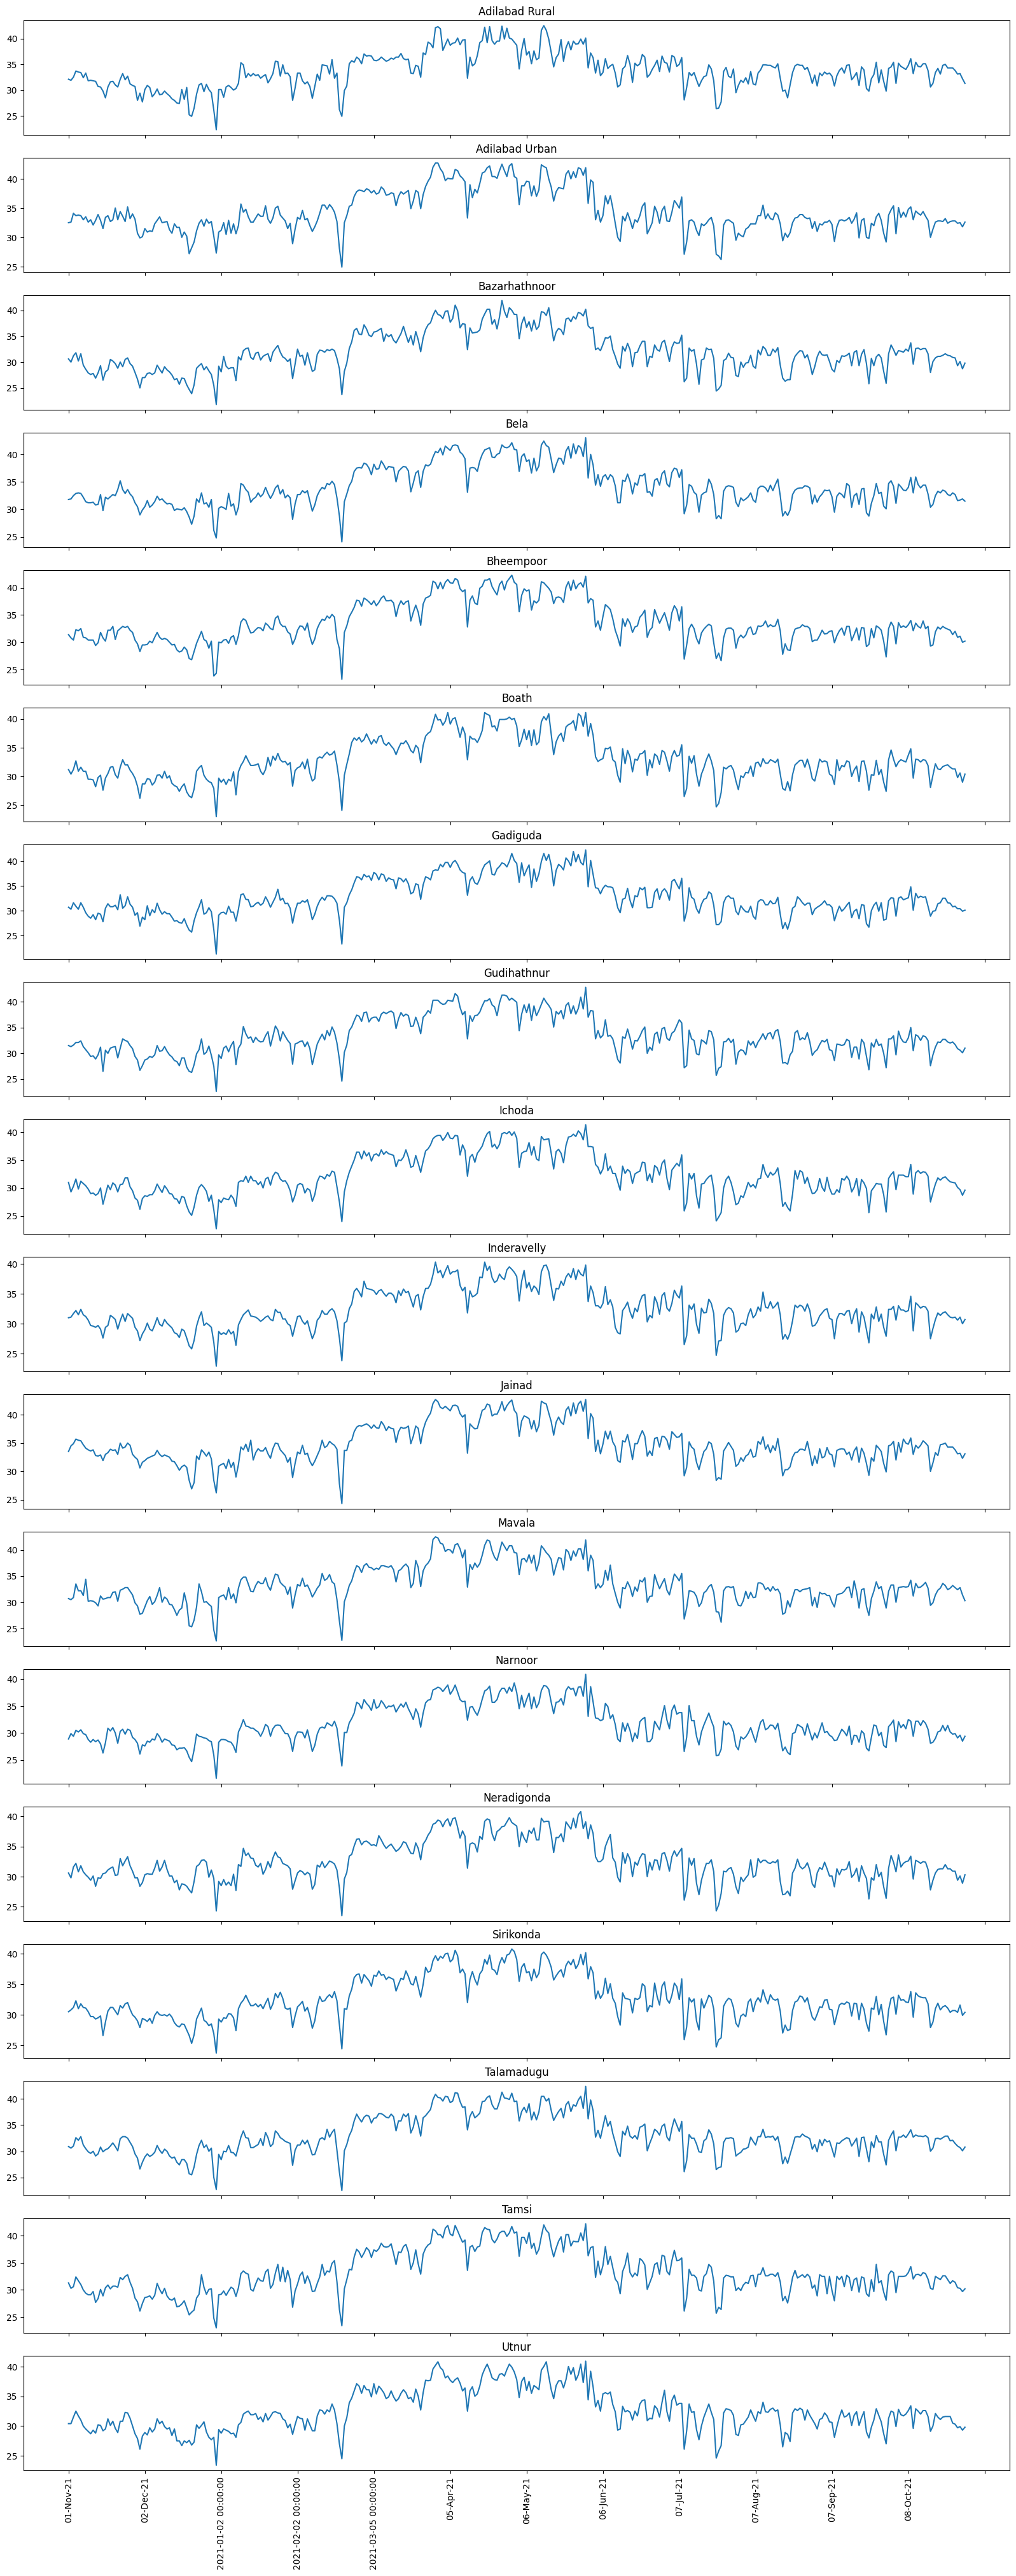

In [115]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


fig, axs = plt.subplots(len(glob.glob('Mandals/2019/Adilabad/*')),figsize=(20,50), sharex=True)
i = -1
for name in glob.glob('Mandals/2019/Adilabad/*'):
    i += 1
    df1 = pd.read_csv(name)
    df1 = df1.set_index("Date")
    axs[i].plot(df1["Max Temp (°C)"])
    axs[i].tick_params(axis='x', labelrotation=90,)
    axs[i].xaxis.set_major_locator(ticker.MultipleLocator(31))
    axs[i].set_title(name.split('\\')[1][:-4])

# Combinig all

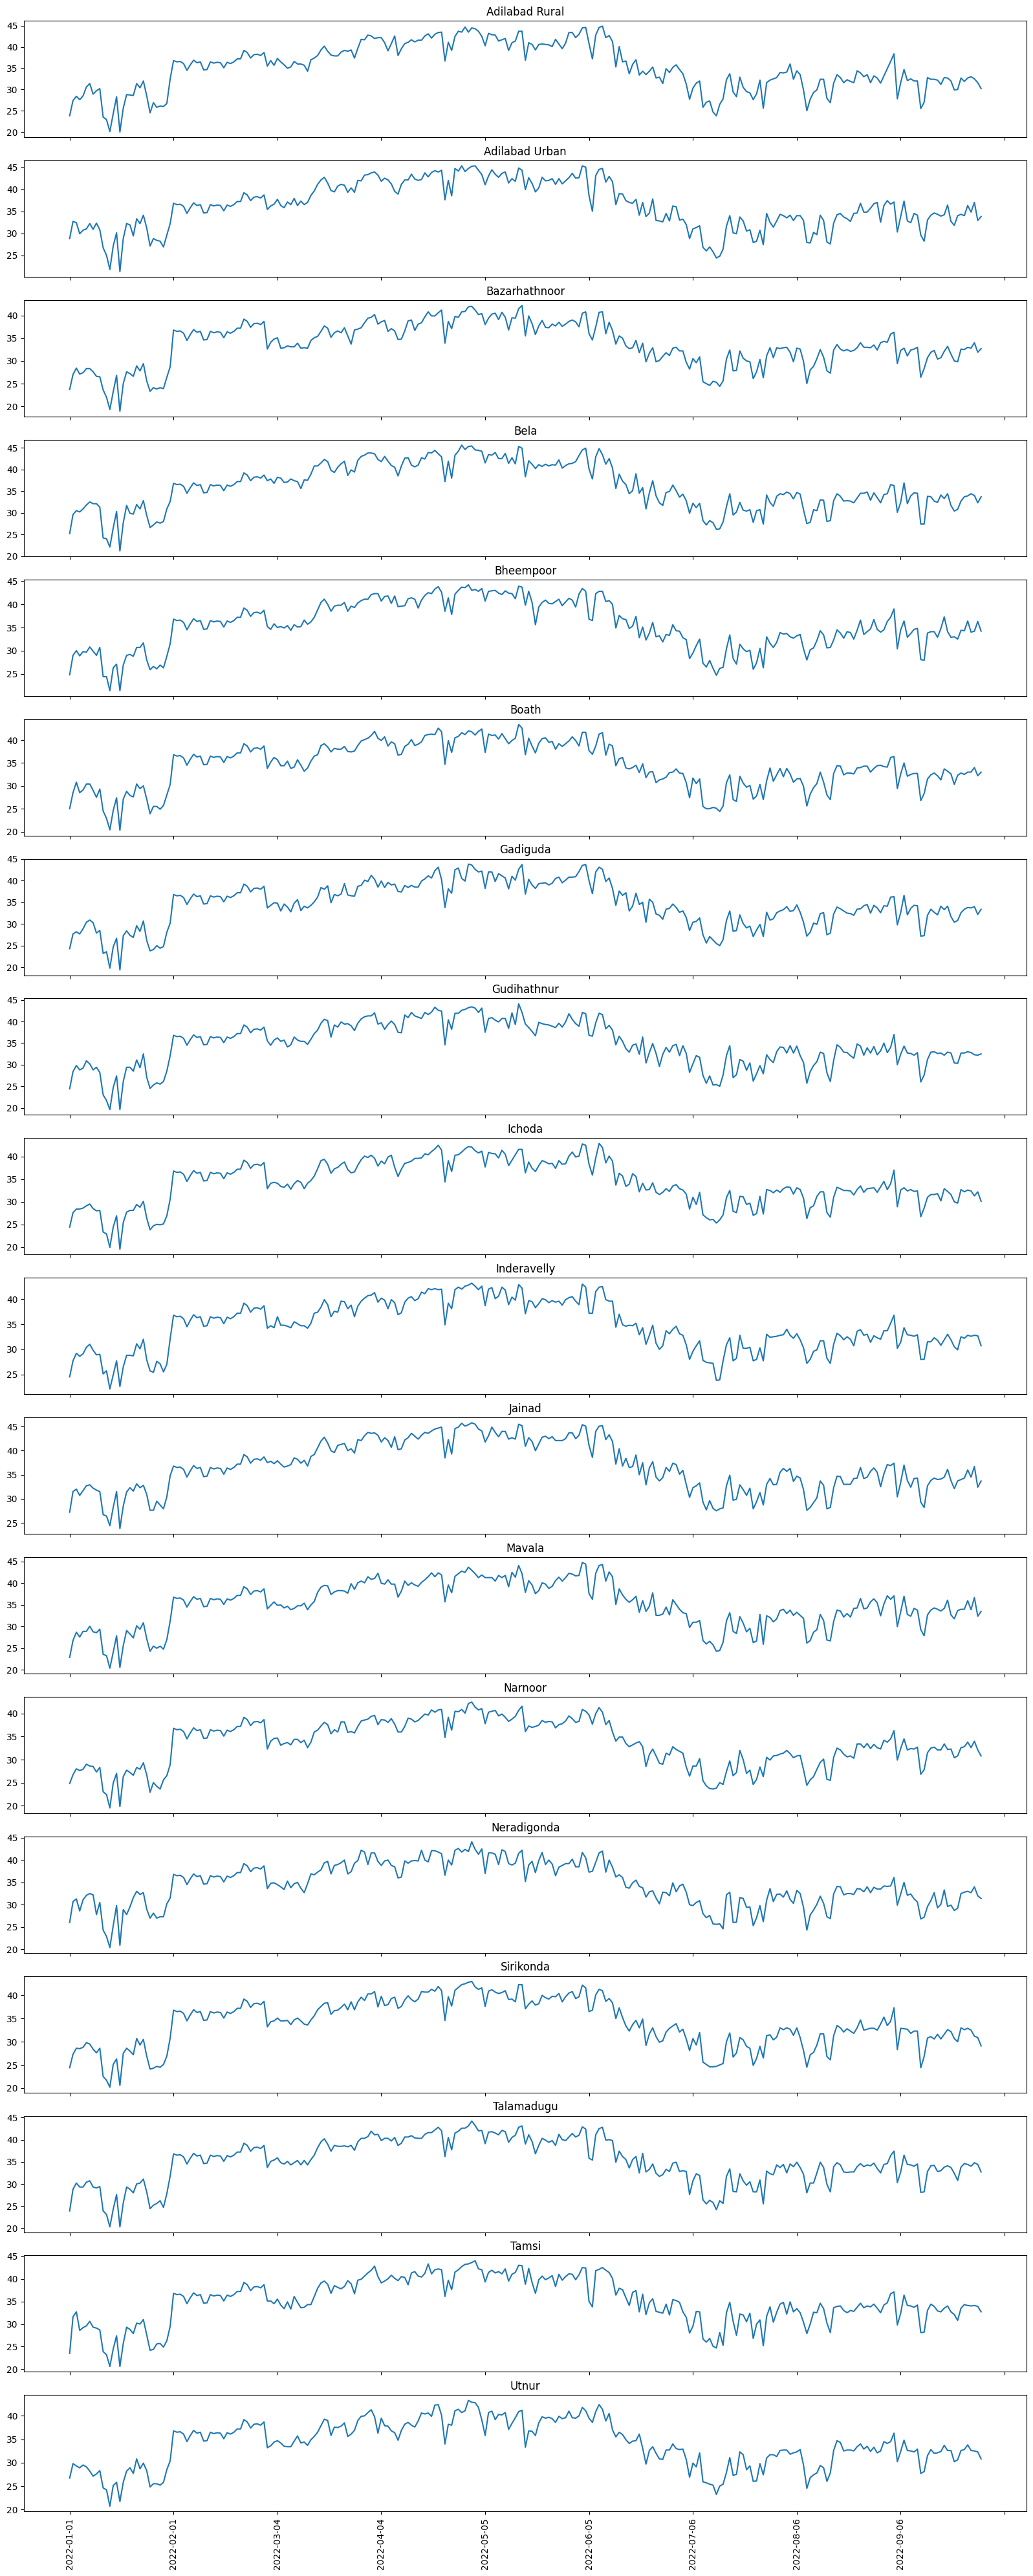

In [156]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


fig, axs = plt.subplots(len(glob.glob('Mandals/2022/Adilabad/*')),figsize=(20,50), sharex=True)
i = -1
for name in glob.glob('Mandals/2022/Adilabad/*'):
    i += 1
    df1 = pd.read_csv(name)
    df1 = df1.set_index("Date")
    axs[i].plot(df1["Max Temp (°C)"])
    axs[i].tick_params(axis='x', labelrotation=90,)
    axs[i].xaxis.set_major_locator(ticker.MultipleLocator(31))
    axs[i].set_title(name.split('\\')[1][:-4])

In [6]:
city = ["Adilabad", "Nizamabad", "Warangal Rural", 'Warangal Urban', "Karimnagar","Khammam","Warangal"]

use = {}

for ci in city:
    paths = []
    for year in glob.glob("Mandals_usable/*"):
        pas_ = []
        for som in glob.glob(year+'/'+ci+'/*'):
            pas_.append(som.split('\\')[2][:-4])
        paths.append(pas_)
    use[ci] = list(set(paths[0]) & set(paths[1]) & set(paths[2]) & set(paths[3]))
        

In [15]:
for ci in city:
    df1 = pd.DataFrame()
    for year in glob.glob("Mandals_usable/*"):
        
        for mands in use[ci]:
            df2 = pd.read_csv(year +'/'+ ci + '/' + mands + '.csv')
            df1 = pd.concat([df1,df2])
    df1.to_csv(ci+'.csv')

In [16]:
gf = pd.read_csv("Adilabad.csv")

In [17]:
gf["Mandal"].unique(
    
)

array(['Mavala', 'Gadiguda', 'Sirikonda', 'Talamadugu', 'Ichoda',
       'Inderavelly', 'Boath', 'Neradigonda', 'Narnoor', 'Adilabad Rural',
       'Utnur', 'Jainad', 'Bheempoor', 'Bela', 'Bazarhathnoor', 'Tamsi'],
      dtype=object)

In [20]:
for ele in gf["Mandal"].unique():
    print(len(gf[gf["Mandal"] == ele]))

1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1367
1368
1368
1368
